In [1]:
!pip install kagglehub


In [2]:
import os
import numpy as np
import tensorflow as tf
import kagglehub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [3]:
path = kagglehub.dataset_download(
    "muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten"
)

data_root = os.path.join(path, os.listdir(path)[0])

print("Dataset Path:", data_root)
print("Number of classes:", len(os.listdir(data_root)))


Using Colab cache for faster access to the 'fruit-and-vegetable-disease-healthy-vs-rotten' dataset.
Dataset Path: /kaggle/input/fruit-and-vegetable-disease-healthy-vs-rotten/Fruit And Vegetable Diseases Dataset
Number of classes: 28


In [4]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data_root,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    data_root,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)


Found 23431 images belonging to 28 classes.
Found 5846 images belonging to 28 classes.


In [5]:
base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze all layers (fast + stable)
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
predictions = Dense(train_data.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 28)             │        14,364 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,729,052 (56.19 MB)

 Trainable params: 14,364 (56.11 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [6]:
callbacks = [
    EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True),
    ModelCheckpoint("healthy_vs_rotten.h5", monitor="val_accuracy", save_best_only=True)
]

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=callbacks
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 43/733 ━━━━━━━━━━━━━━━━━━━━ 5:20 465ms/step - accuracy: 0.0520 - loss: 13.8191

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


733/733 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.2428 - loss: 8.0887

733/733 ━━━━━━━━━━━━━━━━━━━━ 457s 604ms/step - accuracy: 0.2430 - loss: 8.0849 - val_accuracy: 0.7877 - val_loss: 1.0160
Epoch 2/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.6565 - loss: 1.9592

733/733 ━━━━━━━━━━━━━━━━━━━━ 254s 347ms/step - accuracy: 0.6566 - loss: 1.9588 - val_accuracy: 0.8700 - val_loss: 0.5980
Epoch 3/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.7801 - loss: 1.0742

733/733 ━━━━━━━━━━━━━━━━━━━━ 254s 346ms/step - accuracy: 0.7801 - loss: 1.0741 - val_accuracy: 0.8943 - val_loss: 0.4908
Epoch 4/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.8278 - loss: 0.7499

733/733 ━━━━━━━━━━━━━━━━━━━━ 251s 342ms/step - accuracy: 0.8278 - loss: 0.7499 - val_accuracy: 0.9061 - val_loss: 0.4295
Epoch 5/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.8595 - loss: 0.5961

733/733 ━━━━━━━━━━━━━━━━━━━━ 253s 345ms/step - accuracy: 0.8595 - loss: 0.5961 - val_accuracy: 0.9099 - val_loss: 0.4112
Epoch 6/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.8747 - loss: 0.4931

733/733 ━━━━━━━━━━━━━━━━━━━━ 254s 346ms/step - accuracy: 0.8747 - loss: 0.4931 - val_accuracy: 0.9203 - val_loss: 0.3438
Epoch 7/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.8874 - loss: 0.4313

733/733 ━━━━━━━━━━━━━━━━━━━━ 252s 344ms/step - accuracy: 0.8874 - loss: 0.4313 - val_accuracy: 0.9215 - val_loss: 0.3627
Epoch 8/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.8946 - loss: 0.3821

733/733 ━━━━━━━━━━━━━━━━━━━━ 255s 348ms/step - accuracy: 0.8946 - loss: 0.3821 - val_accuracy: 0.9264 - val_loss: 0.3288
Epoch 9/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 257s 351ms/step - accuracy: 0.9049 - loss: 0.3477 - val_accuracy: 0.9187 - val_loss: 0.3644
Epoch 10/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 252s 344ms/step - accuracy: 0.9102 - loss: 0.3131 - val_accuracy: 0.9259 - val_loss: 0.3179


Saving FreshApple (1).jpg to FreshApple (1).jpg


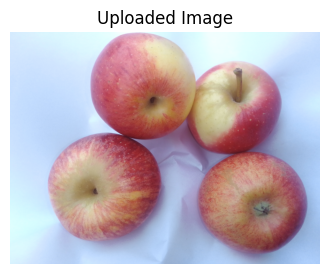

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

🍎 PREDICTION RESULT
Fruit/Vegetable : Apple
Condition       : HEALTHY
Confidence      : 94.49%


In [7]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Create class mapping
class_indices = train_data.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

# Upload image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Display image
img_display = image.load_img(img_path)
plt.figure(figsize=(4,4))
plt.imshow(img_display)
plt.axis("off")
plt.title("Uploaded Image")
plt.show()

# Preprocess
img = image.load_img(img_path, target_size=(224,224))
img = image.img_to_array(img)
img = preprocess_input(img)
img = np.expand_dims(img, axis=0)

# Prediction
pred = model.predict(img)
confidence = float(np.max(pred)) * 100
predicted_class = idx_to_class[np.argmax(pred)]

# Split fruit and condition
fruit_name, condition = predicted_class.split("__")

print("\n==============================")
print("🍎 PREDICTION RESULT")
print("==============================")
print(f"Fruit/Vegetable : {fruit_name}")
print(f"Condition       : {condition.upper()}")
print(f"Confidence      : {confidence:.2f}%")
print("==============================")

In [8]:
model.save("healthy_vs_rotten_model.keras")


In [9]:
from google.colab import files
files.download("healthy_vs_rotten_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
model.save("healthy_vs_rotten_model.h5")
files.download("healthy_vs_rotten_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

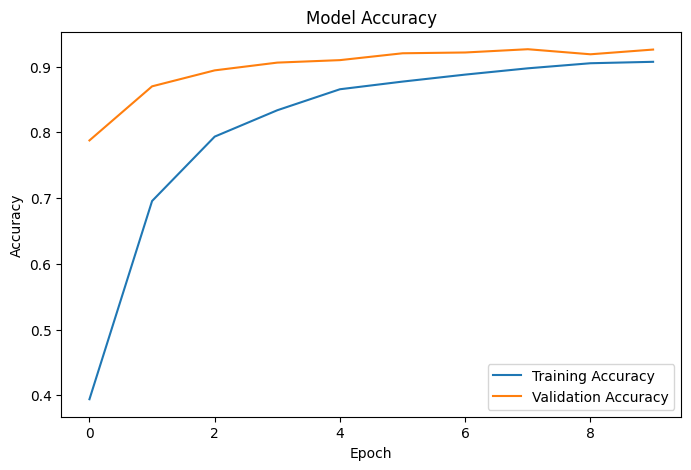

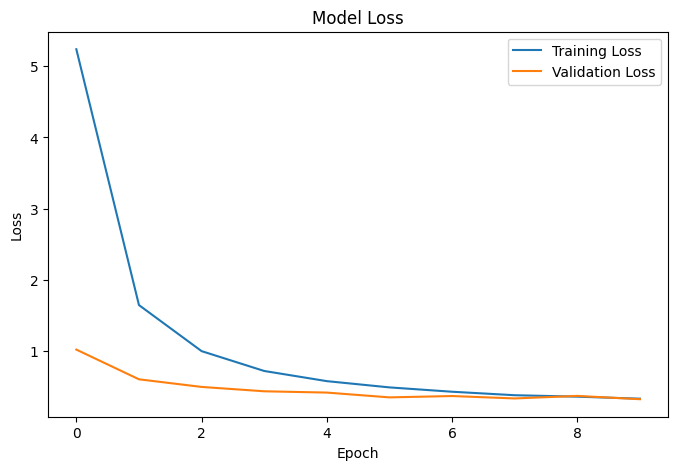

In [11]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

# Loss Plot
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

val_data.reset()
pred = model.predict(val_data)
pred_classes = np.argmax(pred, axis=1)

true_classes = val_data.classes
class_labels = list(val_data.class_indices.keys())

print(classification_report(true_classes, pred_classes, target_names=class_labels))


183/183 ━━━━━━━━━━━━━━━━━━━━ 67s 361ms/step
                      precision    recall  f1-score   support

      Apple__Healthy       0.09      0.06      0.07       487
       Apple__Rotten       0.09      0.11      0.10       585
     Banana__Healthy       0.07      0.07      0.07       399
      Banana__Rotten       0.10      0.11      0.11       559
 Bellpepper__Healthy       0.01      0.01      0.01       122
  Bellpepper__Rotten       0.02      0.03      0.02       118
     Carrot__Healthy       0.01      0.01      0.01       123
      Carrot__Rotten       0.05      0.05      0.05       115
   Cucumber__Healthy       0.02      0.02      0.02       121
    Cucumber__Rotten       0.03      0.03      0.03       118
      Grape__Healthy       0.02      0.03      0.02        40
       Grape__Rotten       0.00      0.00      0.00        40
      Guava__Healthy       0.03      0.03      0.03        40
       Guava__Rotten       0.00      0.00      0.00        40
     Jujube__Healthy     

In [14]:
!ls /content


'FreshApple (1).jpg'    healthy_vs_rotten_model.h5      sample_data
 healthy_vs_rotten.h5   healthy_vs_rotten_model.keras
